## Практика 7

#### Генерим 21 сигналов (временных рядов), 3 класса по 7 образцов в каждом

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import dtaidistance

In [5]:
def pulse(t):
    """Пульс сигнал"""
    return 1 * (abs(t) < 0.5)

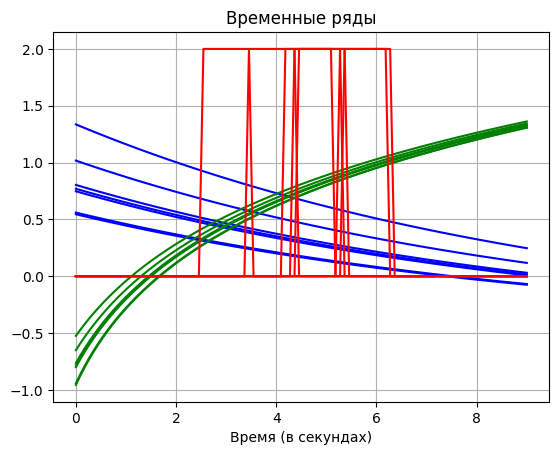

In [7]:
# Индекс и отсчет времени в секундах
time_index = np.linspace(0, 9, 100)

tseries_list = {'Time': time_index}
d = np.random.random(size=10)

N = 7 #количество образцов в каждом типе сигналов

# экспоненциальная функция
for i in range(N):
    tseries_list["Texp"+str(i)]= np.exp(-0.1*time_index + d[i]) - 0.5

# логарифмическая функция
for i in range(N):
    tseries_list["Tlog"+str(i)]= np.log(time_index + d[i] + 1) - 1

# пульс сигнал
for i in range(N):
    tseries_list["Tpulse"+str(i)]= 2*pulse(time_index + 5*d[i] - 6)

# отрисовка всех сигналов
for i in range(N):
    plt.plot(time_index, tseries_list["Texp"+str(i)], '-b')
for i in range(N):
    plt.plot(time_index, tseries_list["Tlog"+str(i)], '-g')
for i in range(N):
    plt.plot(time_index, tseries_list["Tpulse"+str(i)], '-r')
            
plt.title(r'Временные ряды')
plt.xlabel(r'Время (в секундах)')
plt.grid()


#### Расстояние между рядами по формуле Евклида и с помощью DTW

In [ ]:
!pip install dtaidistance

In [22]:
def getName(a):
    if a == 0: return "TExp"
    elif a == 1: return "TLog"
    else: return "TPulse"

In [11]:
distList = [[tseries_list["Texp"+str(i)] for i in range(N)], [tseries_list["Tlog"+str(i)] for i in range(N)], [tseries_list["Tpulse"+str(i)] for i in range(N)]]

In [28]:
#Среднее рассторяние между сигналами
print("Среднее расстояние для каждой возможной пары сигналов")

print("\n[EUCLIDEAN]")
for a in range(3):
    for b in range(3):
        ti = 0
        for i in range(N):
            for j in range(N):
                ti += euclidean(distList[a][i], distList[b][j])
        ti /= N**2
        print(f'{getName(a)} & {getName(b)} = {ti}')

print("\n[DTW]")
for a in range(3):
    for b in range(3):
        ti = 0
        for i in range(N):
            for j in range(N):
                ti += dtaidistance.dtw.distance(distList[a][i], distList[b][j])
        ti /= N**2
        print(f'{getName(a)} & {getName(b)} = {ti}')



Среднее расстояние для каждой возможной пары сигналов

[EUCLIDEAN]
TExp & TExp = 1.861268353869179
TExp & TLog = 8.38220795579363
TExp & TPulse = 7.1450801505911565
TLog & TExp = 8.382207955793625
TLog & TLog = 0.5592641138794335
TLog & TPulse = 8.905461440402997
TPulse & TExp = 7.1450801505911565
TPulse & TLog = 8.905461440402997
TPulse & TPulse = 6.939075488384053

[DTW]
TExp & TExp = 1.0062344277868214
TExp & TLog = 8.38220795579363
TExp & TPulse = 6.959130211803873
TLog & TExp = 8.382207955793625
TLog & TLog = 0.21518317480883575
TLog & TPulse = 8.873393705889184
TPulse & TExp = 6.959130211803872
TPulse & TLog = 8.873393705889185
TPulse & TPulse = 0.0


DTW лучше справился с задачей обнаружения схожести сигналов, н-р для сигнала TPulse значение равно 0 (против 6.9 у Евклида), а для сигнала TLog зн-е равно 0.2 (против 0.56 у Евклида)